In [1]:
import numpy as np
import pandas as pd

#sklearn modules
from sklearn import datasets, preprocessing
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

import seaborn as sns
import pickle
%matplotlib widget

In [2]:
df = pd.read_csv("./../city_data/city_data2.csv", sep=";")
df.head()

,City,County,State,population,urban_area_pop,area,urban_area_density,water_area_prop,density,Unnamed: 9
0,albuquerque,bernalillo,NM,562599,916500,"467,9","1129,9","0,34","1202,391537",NaN
1,atlanta,fulton,GA,499127,6222106,"354,22","771,3","0,76","1409,087573",NaN
2,austin,travis,TX,978908,2115827,"790,11","1127,8","2,35","1238,951538",NaN
3,baltimore,baltimo,MD,585708,2844510,"238,4","1304,1","12,08","2456,828859",NaN
4,boise,ada,ID,235684,795268,"216,7","1201,3","1,15","1087,604984",NaN


In [3]:
#remove the last useless column
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
# df = df.rename(columns={"area (km2)" : "area", "water area (%)" : "water_area", "density (hab/km2)" : "density"})

# Remove the cities of brooklyn, fort worth, oakland, raleigh and staten island as they are in urban areas of 
# Bigger cities and not representative of the environment
df = df.dropna()
df.head()

,City,County,State,population,urban_area_pop,area,urban_area_density,water_area_prop,density
0,albuquerque,bernalillo,NM,562599,916500,"467,9","1129,9","0,34","1202,391537"
1,atlanta,fulton,GA,499127,6222106,"354,22","771,3","0,76","1409,087573"
2,austin,travis,TX,978908,2115827,"790,11","1127,8","2,35","1238,951538"
3,baltimore,baltimo,MD,585708,2844510,"238,4","1304,1","12,08","2456,828859"
4,boise,ada,ID,235684,795268,"216,7","1201,3","1,15","1087,604984"


In [4]:
df.shape

(48, 9)

In [31]:
with open("./clusters/all_cities.pkl", 'wb') as file :    
    pickle.dump(df["City"].to_frame(), file)

In [5]:
def convert_to_float(x) :
    if type(x) == str :
        x = x.replace(" ","")
        x = x.replace(",",".")
    x = float(x)
    return x

<h1>Correlation map</h1>

In [6]:
features_df = df.loc[:, ["population", "urban_area_pop", "density", "urban_area_density", "water_area_prop"]]
features_df = features_df.map(convert_to_float)

corr = features_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,population,urban_area_pop,density,urban_area_density,water_area_prop
population,1.000000,0.841446,0.415063,0.461482,-0.001743
urban_area_pop,0.841446,1.000000,0.577892,0.524710,0.164147
density,0.415063,0.577892,1.000000,0.370227,0.090402
urban_area_density,0.461482,0.524710,0.370227,1.000000,0.244009
water_area_prop,-0.001743,0.164147,0.090402,0.244009,1.000000


In [9]:
def clustering(features, n_clusters = 3, df = df) :
    model = KMeans(n_clusters, n_init="auto")
    X = df.loc[:, features]
    print("shape of input",X.shape)
    X = X.map(convert_to_float)
    print(" ")
    d = preprocessing.StandardScaler()
    standard_data = d.fit_transform(X)
    
    scaled_X = pd.DataFrame(standard_data, columns = X.columns)
    print("scaled input head")
    print(scaled_X.head())
    print(" ")
    
    model.fit(scaled_X)
    
    print("model labels")
    print(model.labels_)
    
    X_end = X
    X_end["cluster"] = model.labels_
    
    return(X_end)

<h1>First clustering : Population</h1>

In [21]:
X_pop_clust = clustering(["population", "urban_area_pop"], n_clusters=4)

shape of input (48, 2)
 
scaled input head
   population  urban_area_pop
0   -0.293005       -0.687334
1   -0.382372        1.254591
2    0.293150       -0.248364
3   -0.260468        0.018344
4   -0.753295       -0.731706
 
model labels
[0 2 3 3 0 2 3 1 0 3 2 3 2 3 0 0 0 1 3 0 3 3 0 1 0 0 3 2 3 3 3 0 2 2 3 0 0
 3 0 0 3 3 2 2 3 0 0 0]


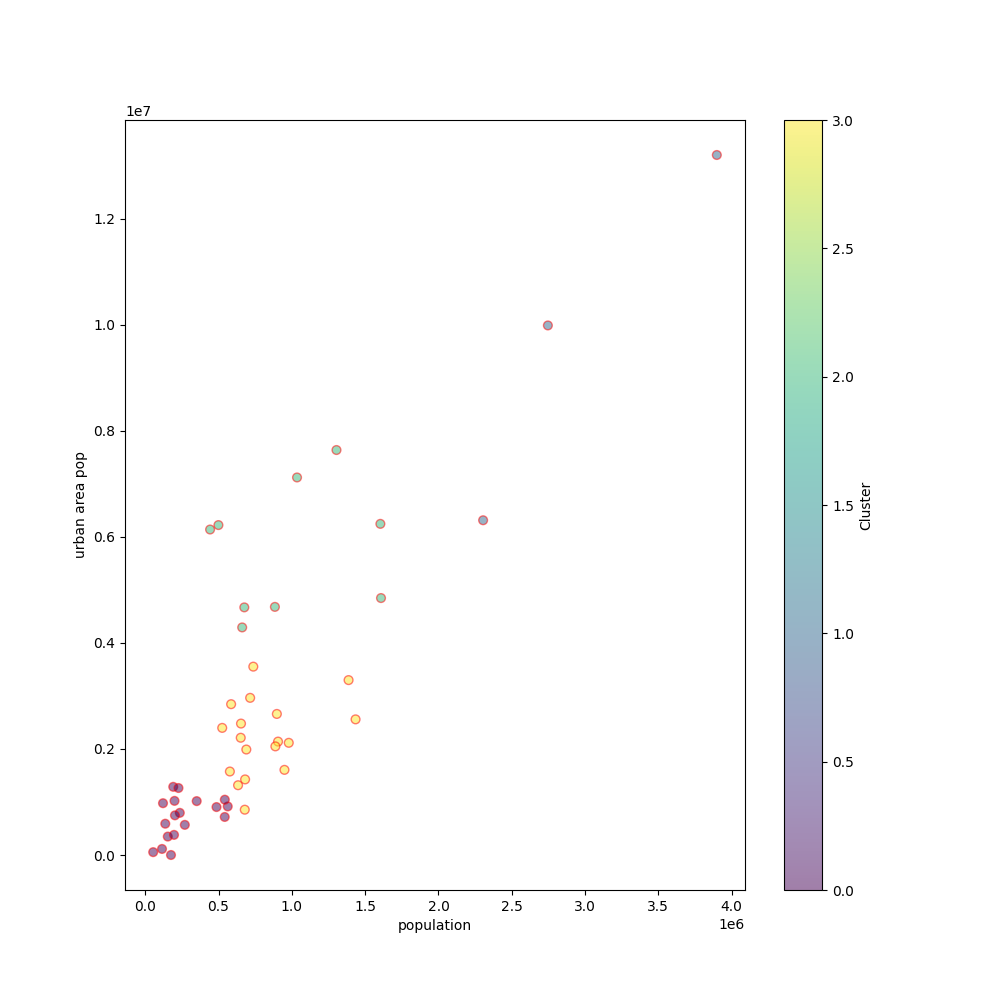

In [22]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

# Scatter plot
scatter = ax.scatter(X_pop_clust.loc[:, "population"], X_pop_clust.loc[:, "urban_area_pop"], c=X_pop_clust["cluster"], edgecolor='red', s=40, alpha=0.5)

# Set labels for the axes
ax.set_xlabel("population")
ax.set_ylabel("urban area pop")
ax.dist = 10  # Adjust the distance of the 3D plot

# Create a colorbar to show the cluster legend
cbar = plt.colorbar(scatter, ax=ax, label='Cluster')

# Display the plot
plt.show()


In [23]:
X_pop_clust.groupby("cluster").describe()

population                                                     \
             count          mean            std        min        25%   
cluster                                                                 
0             18.0  2.645176e+05  161640.086920    54100.0   159159.5   
1              3.0  2.983238e+06  823052.650972  2304580.0  2525484.0   
2              9.0  9.682469e+05  449240.751634   442260.0   661193.0   
3             18.0  8.093583e+05  257061.295862   524943.0   651768.0   

                                         urban_area_pop                \
               50%        75%        max          count          mean   
cluster                                                                 
0         201157.0   330683.0   562599.0           18.0  7.080364e+05   
1        2746388.0  3322567.5  3898747.0            3.0  9.833705e+06   
2         884363.0  1304379.0  1608139.0            9.0  5.761104e+06   
3         702484.5   903741.0  1434625.0           18.0  2.224169e+06   

                                                                     \
                  std        min         25%        50%         75%   
cluster                                                               
0        3.958567e+05      268.0   426868.50   771649.5   1006670.5   
1        3.446476e+06  6313158.0  8150059.00  9986960.0  11593979.0   
2        1.189169e+06  4292060.0  4679166.00  6138333.0   6245051.0   
3        7.068395e+05   854584.0  1701765.75  2175120.5   2634782.5   

                     
                max  
cluster              
0         1285806.0  
1        13200998.0  
2         7637387.0  
3         3552157.0

In [24]:
X_pop_clust_final = pd.concat([df.reset_index(), X_pop_clust["cluster"].reset_index()], axis=1)
X_pop_clust_final

,index,City,County,State,population,urban_area_pop,area,urban_area_density,water_area_prop,density,index,cluster
0,0,albuquerque,bernalillo,NM,562599,916500,"467,9","1129,9","0,34","1202,391537",0,0
1,1,atlanta,fulton,GA,499127,6222106,"354,22","771,3","0,76","1409,087573",1,2
2,2,austin,travis,TX,978908,2115827,"790,11","1127,8","2,35","1238,951538",2,3
3,3,baltimore,baltimo,MD,585708,2844510,"238,4","1304,1","12,08","2456,828859",3,3
4,4,boise,ada,ID,235684,795268,"216,7","1201,3","1,15","1087,604984",4,0
5,5,boston,suffolk,MA,675647,4670000,"232,1","1021,8","45,96","2911,016803",5,2
6,7,charlotte,mecklenburg,NC,897720,2660329,"808,08","810,2","0,64","1110,929611",7,3
7,8,chicago,cook,IL,2746388,9986960,606,"1432,1","2,97","4531,993399",8,1
8,9,columbia,richland,SC,136632,590407,"342,43","620,3","2,05","399,0070963",9,0
9,10,columbus,franklin,OH,905748,2138926,"577,85","1172,3","2,66","1567,444839",10,3


In [25]:
with open("./clusters/X_pop_clust.pkl", 'wb') as file :    
    pickle.dump(X_pop_clust_final, file)

<h1>Second Clustering : density</h1>


In [142]:
X_dens_clust = clustering(["density", "urban_area_density"])

shape of input (48, 2)
 
scaled input head
    density  urban_area_density
0 -0.426594           -0.265852
1 -0.210868           -0.955933
2 -0.388437           -0.269894
3  0.882644            0.069374
4 -0.546395           -0.128452
 
model labels
[0 0 0 2 0 2 0 2 0 0 0 1 0 0 1 2 1 0 0 0 0 1 0 1 0 0 0 1 2 0 0 0 2 0 1 2 0
 1 0 0 0 1 1 1 0 0 0 0]


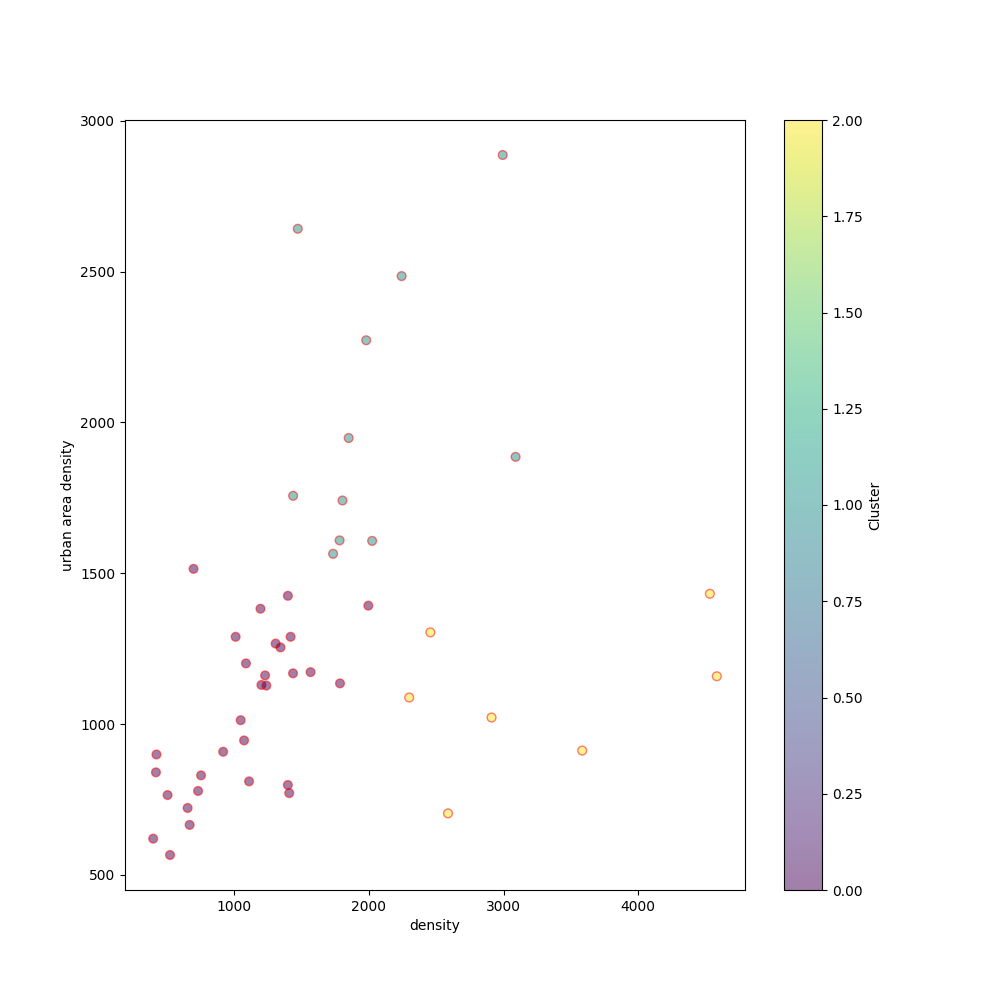

In [143]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

# Scatter plot
scatter = ax.scatter(X_dens_clust.loc[:, "density"], X_dens_clust.loc[:, "urban_area_density"], c=X_dens_clust["cluster"], edgecolor='red', s=40, alpha=0.5)

# Set labels for the axes
ax.set_xlabel("density")
ax.set_ylabel("urban area density")
ax.dist = 10  # Adjust the distance of the 3D plot

# Create a colorbar to show the cluster legend
cbar = plt.colorbar(scatter, ax=ax, label='Cluster')

# Display the plot
plt.show()


In [144]:
X_dens_clust.groupby("cluster").describe()

density                                                     \
          count         mean         std          min          25%   
cluster                                                              
0          30.0  1065.466106  417.146761   399.007096   706.966767   
1          11.0  2037.739117  546.999151  1437.890852  1758.855706   
2           7.0  3279.301952  967.247685  2299.689243  2522.279329   

                                               urban_area_density  \
                 50%          75%          max              count   
cluster                                                             
0        1099.267298  1385.161080  1996.248646               30.0   
1        1850.338068  2134.023308  3089.486553               11.0   
2        2911.016803  4058.131109  4583.586739                7.0   

                                                                            
                mean         std     min     25%     50%       75%     max  
cluster                                                                     
0        1028.186667  264.772394   566.1   801.2  1070.4  1240.975  1514.7  
1        2036.345455  461.695192  1564.5  1675.2  1886.0  2378.750  2886.6  
2        1088.714286  242.497054   704.0   967.0  1088.2  1231.350  1432.1

In [145]:
X_dens_clust_final = pd.concat([df.reset_index(), X_dens_clust["cluster"].reset_index()], axis=1)
X_dens_clust_final

,index,City,County,State,population,urban_area_pop,area,urban_area_density,water_area_prop,density,index,cluster
0,0,albuquerque,bernalillo,NM,562599,916500,"467,9","1129,9","0,34","1202,391537",0,0
1,1,atlanta,fulton,GA,499127,6222106,"354,22","771,3","0,76","1409,087573",1,0
2,2,austin,travis,TX,978908,2115827,"790,11","1127,8","2,35","1238,951538",2,0
3,3,baltimore,baltimo,MD,585708,2844510,"238,4","1304,1","12,08","2456,828859",3,2
4,4,boise,ada,ID,235684,795268,"216,7","1201,3","1,15","1087,604984",4,0
5,5,boston,suffolk,MA,675647,4670000,"232,1","1021,8","45,96","2911,016803",5,2
6,7,charlotte,mecklenburg,NC,897720,2660329,"808,08","810,2","0,64","1110,929611",7,0
7,8,chicago,cook,IL,2746388,9986960,606,"1432,1","2,97","4531,993399",8,2
8,9,columbia,richland,SC,136632,590407,"342,43","620,3","2,05","399,0070963",9,0
9,10,columbus,franklin,OH,905748,2138926,"577,85","1172,3","2,66","1567,444839",10,0


In [160]:
with open("./clusters/X_dens_clust.pkl", 'wb') as file :    
    pickle.dump(X_dens_clust_final, file)

<h1>Third Clustering : water area</h1>
previous research have shown the water area has a strong effect on pollutant

In [156]:
X_water_clust = clustering(["water_area_prop"])

shape of input (48, 1)
 
scaled input head
   water_area_prop
0        -0.538839
1        -0.513174
2        -0.416013
3         0.178561
4        -0.489342
 
model labels
[0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 2 0 0 0]


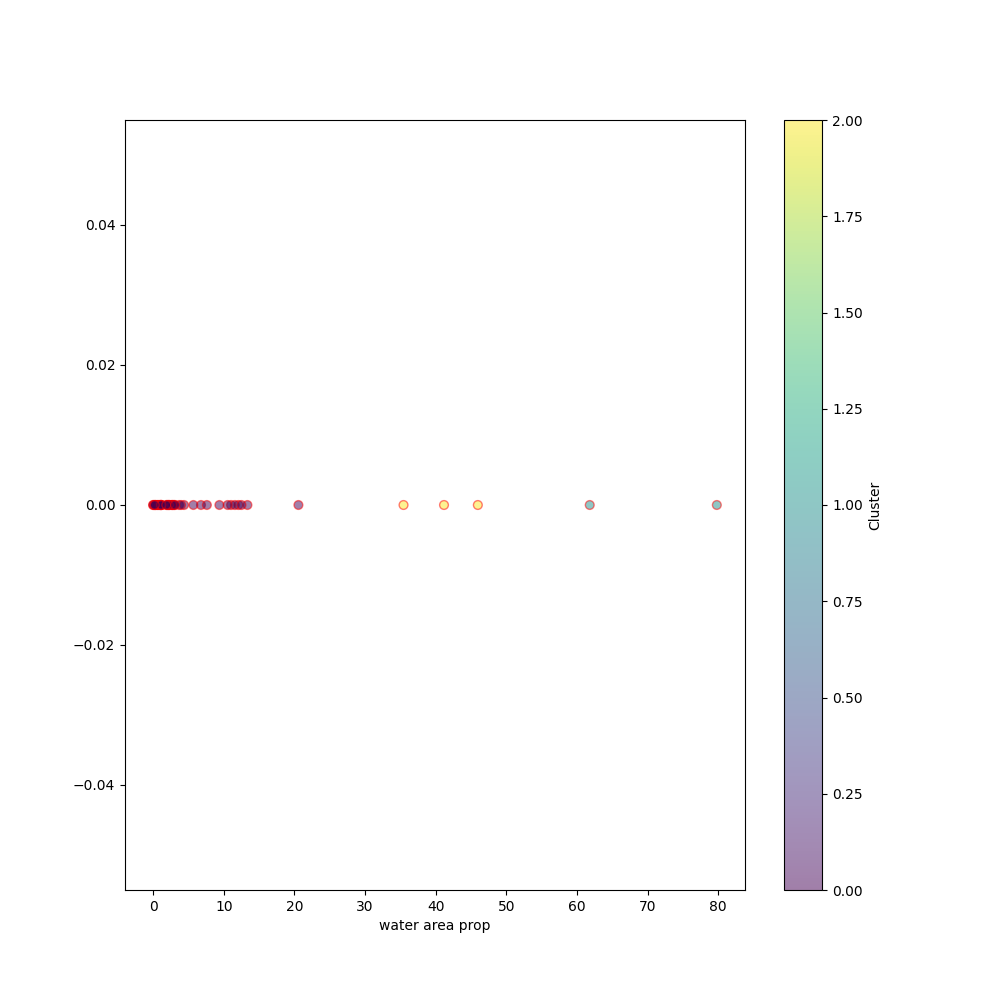

In [157]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

# Scatter plot
scatter = ax.scatter(X_water_clust.loc[:, "water_area_prop"],[0]*X_water_clust.loc[:, "water_area_prop"].shape[0], c=X_water_clust["cluster"], edgecolor='red', s=40, alpha=0.5)

# Set labels for the axes
ax.set_xlabel("water area prop")

ax.dist = 10  # Adjust the distance of the 3D plot

# Create a colorbar to show the cluster legend
cbar = plt.colorbar(scatter, ax=ax, label='Cluster')

# Display the plot
plt.show()


In [148]:
X_water_clust.groupby("cluster").describe()

water_area_prop                                                      \
                  count       mean        std    min    25%    50%      75%   
cluster                                                                       
0                  34.0   1.965882   1.604592   0.00   0.79   1.90   2.7375   
1                   5.0  52.832000  17.978230  35.44  41.17  45.96  61.8000   
2                   9.0  12.064444   3.620118   7.60  10.54  11.57  12.5000   

                
           max  
cluster         
0         6.77  
1        79.79  
2        20.56

In [149]:
X_water_clust_final = pd.concat([df.reset_index(), X_water_clust["cluster"].reset_index()], axis=1)
X_water_clust_final

,index,City,County,State,population,urban_area_pop,area,urban_area_density,water_area_prop,density,index,cluster
0,0,albuquerque,bernalillo,NM,562599,916500,"467,9","1129,9","0,34","1202,391537",0,0
1,1,atlanta,fulton,GA,499127,6222106,"354,22","771,3","0,76","1409,087573",1,0
2,2,austin,travis,TX,978908,2115827,"790,11","1127,8","2,35","1238,951538",2,0
3,3,baltimore,baltimo,MD,585708,2844510,"238,4","1304,1","12,08","2456,828859",3,2
4,4,boise,ada,ID,235684,795268,"216,7","1201,3","1,15","1087,604984",4,0
5,5,boston,suffolk,MA,675647,4670000,"232,1","1021,8","45,96","2911,016803",5,1
6,7,charlotte,mecklenburg,NC,897720,2660329,"808,08","810,2","0,64","1110,929611",7,0
7,8,chicago,cook,IL,2746388,9986960,606,"1432,1","2,97","4531,993399",8,0
8,9,columbia,richland,SC,136632,590407,"342,43","620,3","2,05","399,0070963",9,0
9,10,columbus,franklin,OH,905748,2138926,"577,85","1172,3","2,66","1567,444839",10,0


In [ ]:
with open("./clusters/X_water_clust.pkl", 'wb') as file :    
    pickle.dump(X_water_clust_final, file)

<h1>Fourth Clustering : Pop and Density</h1>
previous research have shown the water area has a strong effect on pollutant

In [15]:
X_pop_dens_clust = clustering(["population", "density"], n_clusters=4)

shape of input (48, 2)
 
scaled input head
   population   density
0   -0.293005 -0.426594
1   -0.382372 -0.210868
2    0.293150 -0.388437
3   -0.260468  0.882644
4   -0.753295 -0.546395
 
model labels
[1 1 3 0 1 0 3 2 1 3 3 0 0 1 0 0 0 3 1 1 1 0 1 2 1 1 1 0 0 1 1 1 2 3 0 0 1
 0 1 1 3 3 3 0 0 1 1 1]


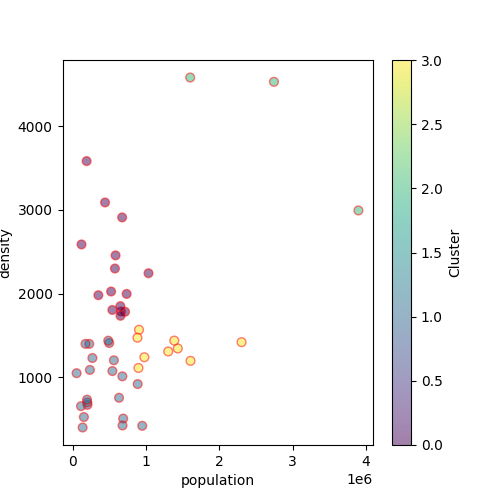

In [22]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

# Scatter plot
scatter = ax.scatter(X_pop_dens_clust.loc[:, "population"],X_pop_dens_clust.loc[:, "density"], c=X_pop_dens_clust["cluster"], edgecolor='red', s=40, alpha=0.5)

# Set labels for the axes
ax.set_xlabel("population")
ax.set_ylabel("density")

ax.dist = 10  # Adjust the distance of the 3D plot

# Create a colorbar to show the cluster legend
cbar = plt.colorbar(scatter, ax=ax, label='Cluster')

# Display the plot
plt.show()


In [17]:
X_pop_dens_clust.groupby("cluster").describe()

population                                                    \
             count          mean           std        min        25%   
cluster                                                                
0             15.0  5.642880e+05  2.253163e+05   121054.0   483601.5   
1             21.0  4.083361e+05  2.714340e+05    54100.0   196169.0   
2              3.0  2.749644e+06  1.147478e+06  1603797.0  2175092.5   
3              9.0  1.300599e+06  4.640778e+05   884363.0   905748.0   

                                         density                           \
               50%        75%        max   count         mean         std   
cluster                                                                     
0         585708.0   668420.0  1035317.0    15.0  2275.500934  555.257779   
1         269840.0   633104.0   949611.0    21.0   904.626322  357.400511   
2        2746388.0  3322567.5  3898747.0     3.0  4036.554846  903.174370   
3        1304379.0  1434625.0  2304580.0     9.0  1343.877310  145.566829   

                                                                          
                 min          25%          50%          75%          max  
cluster                                                                   
0        1734.701195  1827.417553  2024.672835  2522.279329  3584.268819  
1         399.007096   654.465358   918.598779  1202.391537  1437.170313  
2        2994.084399  3763.038899  4531.993399  4557.790069  4583.586739  
3        1110.929611  1238.951538  1344.162841  1437.890852  1567.444839

In [18]:
X_pop_dens_clust_final = pd.concat([df.reset_index(), X_pop_dens_clust["cluster"].reset_index()], axis=1)
X_pop_dens_clust_final

,index,City,County,State,population,urban_area_pop,area,urban_area_density,water_area_prop,density,index,cluster
0,0,albuquerque,bernalillo,NM,562599,916500,"467,9","1129,9","0,34","1202,391537",0,1
1,1,atlanta,fulton,GA,499127,6222106,"354,22","771,3","0,76","1409,087573",1,1
2,2,austin,travis,TX,978908,2115827,"790,11","1127,8","2,35","1238,951538",2,3
3,3,baltimore,baltimo,MD,585708,2844510,"238,4","1304,1","12,08","2456,828859",3,0
4,4,boise,ada,ID,235684,795268,"216,7","1201,3","1,15","1087,604984",4,1
5,5,boston,suffolk,MA,675647,4670000,"232,1","1021,8","45,96","2911,016803",5,0
6,7,charlotte,mecklenburg,NC,897720,2660329,"808,08","810,2","0,64","1110,929611",7,3
7,8,chicago,cook,IL,2746388,9986960,606,"1432,1","2,97","4531,993399",8,2
8,9,columbia,richland,SC,136632,590407,"342,43","620,3","2,05","399,0070963",9,1
9,10,columbus,franklin,OH,905748,2138926,"577,85","1172,3","2,66","1567,444839",10,3


In [19]:
with open("./clusters/X_pop_dens_clust.pkl", 'wb') as file :    
    pickle.dump(X_pop_dens_clust_final, file)